In [2]:
!pip install face_recognition


     |████████████████████████████████| 100.2MB 46kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=08ae14b0353d469a8190fa7e4e07ab44baf5e5d1eacc76afc8b580d018c4f042
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [42]:
import face_recognition as fr
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* basic operation in face_recognition library

* load image, find face, draw rectangle aroud face

---



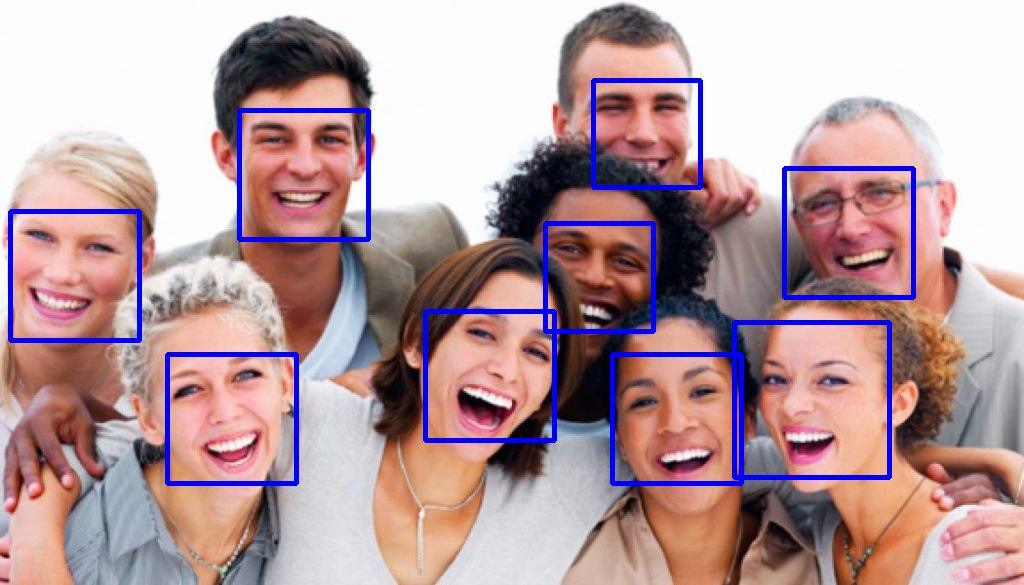

In [59]:
elon1=fr.load_image_file("/content/drive/My Drive/face recognition/datas/people.jpg")
elon1=cv2.cvtColor(elon1,cv2.COLOR_BGR2RGB)

face_locations=fr.face_locations(elon1)
for i in face_locations:
  x1,y1,x2,y2=i[3],i[0],i[1],i[2]

  cv2.rectangle(elon1,
              (x1,y1),
              (x2,y2),
              (255,0,0),
              3)

cv2_imshow(elon1)


In [ ]:
#image for train
elon_tr=fr.load_image_file("/content/drive/My Drive/face recognition/datas/elon1.jpg")
elon_tr=cv2.cvtColor(elon_tr,cv2.COLOR_BGR2RGB)

#image for test
elon_te=fr.load_image_file("/content/drive/My Drive/face recognition/datas/elon2.jpg")
elon_te=cv2.cvtColor(elon_te,cv2.COLOR_BGR2RGB)

#find locations of face
face_loc1=fr.face_locations(elon_tr)[0]
#draw rectangle
cv2.rectangle(elon_tr,
              (face_loc1[3],face_loc1[0]),
              (face_loc1[1],face_loc1[2]),
              (255,0,0),
              3)
#encode face 
elon_enc1=fr.face_encodings(elon_tr)[0]


#for test img
face_loc2=fr.face_locations(elon_te)[0]
cv2.rectangle(elon_te,
              (face_loc2[3],face_loc2[0]),
              (face_loc2[1],face_loc2[2]),
              (255,0,0),
              3)
elon_enc2=fr.face_encodings(elon_te)[0]

cv2_imshow(elon_tr)
cv2_imshow(elon_te)

Comerision of faces


*result,*distance

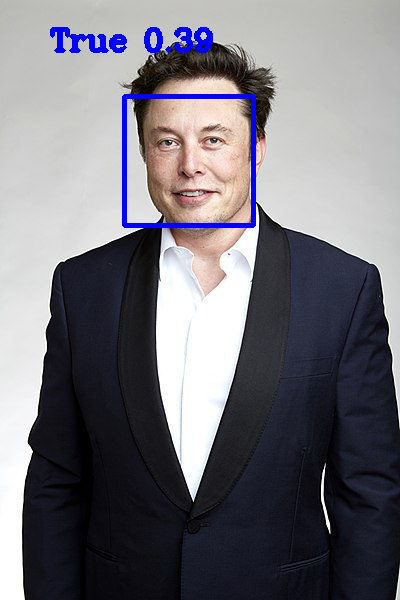

In [66]:
result=fr.compare_faces([elon_enc1],elon_enc2)[0]
face_distance=fr.face_distance([elon_enc1],elon_enc2)[0]
#print(result,face_distance)

cv2.putText(elon_te,
            f"{result} {round(face_distance,2)}",
            (50,50),
            cv2.FONT_HERSHEY_COMPLEX,
            1,
            (255,0,0),
            3)
cv2_imshow(elon_te)